In [1]:
import tensorflow as tf
from sklearn import model_selection,datasets
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# setting the global seed to ensure having reproducible results
tf.random.set_seed(42)

## First classification dataset with fully connected (Dense) neural network to predict the output based on the input features "iris dataset"


Assigning the `features` and `labels` from the Sickit Learn dataset

In [3]:
iris_features,iris_labels = datasets.load_iris(return_X_y=True)

Splitting the data using `model_selection.train_test_split` from Scikit Learn with test size of '0.1' and using `stratify` to ensure a balanced number of examples for each class label, also setting the `random_state`


In [4]:
iris_features_train, iris_features_test, iris_labels_train, iris_labels_test = model_selection.train_test_split(iris_features, iris_labels, random_state=42, stratify=iris_labels, test_size=0.1)

One Hot encodeing the `targets/outputs ` to get a better prediction

In [5]:
iris_labels_train = tf.one_hot(iris_labels_train,depth=len(set(iris_labels)))
iris_labels_test = tf.one_hot(iris_labels_test, depth=len(set(iris_labels)))

Using the shape of the `features ` to determine the number of units for the input layer '4' and the shape of the `labels ` to determine the number of units for the output layer  '3' of the model

In [6]:
iris_features_train.shape, iris_labels_train.shape

((135, 4), TensorShape([135, 3]))

### Building and trainning the model

In [7]:
# to restart tensorflow state
del tf
import tensorflow as tf
tf.random.set_seed(42)

In [8]:
iris_model = tf.keras.Sequential([
                             tf.keras.layers.Input(shape=[4]),
                             tf.keras.layers.Dense(128,activation=tf.nn.leaky_relu),
                             tf.keras.layers.Dropout(0.1), # using regularization technique to avoid overfitting
                             tf.keras.layers.Dense(256,activation=tf.nn.leaky_relu),
                             tf.keras.layers.Dropout(0.1),
                             tf.keras.layers.Dense(128,activation=tf.nn.leaky_relu),
                             tf.keras.layers.Dropout(0.1),
                             tf.keras.layers.Dense(16,activation=tf.nn.leaky_relu),
                             tf.keras.layers.Dense(3,activation=tf.nn.softmax)
])

In [9]:
iris_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               640       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                2

Using the accuracy metric in the compile function to display 'accuracy' during training



In [10]:
iris_model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.CategoricalCrossentropy(), metrics=['acc'])

In [11]:
iris_fit = iris_model.fit(x= iris_features_train,y= iris_labels_train,epochs=30, validation_data=(iris_features_test, iris_labels_test))

Epoch 1/30
5/5 [==============================] - 1s 124ms/step - loss: 1.1078 - acc: 0.4140 - val_loss: 0.8916 - val_acc: 0.6667
Epoch 2/30
5/5 [==============================] - 0s 15ms/step - loss: 0.9157 - acc: 0.5318 - val_loss: 0.7006 - val_acc: 0.8667
Epoch 3/30
5/5 [==============================] - 0s 14ms/step - loss: 0.7274 - acc: 0.7511 - val_loss: 0.5528 - val_acc: 0.7333
Epoch 4/30
5/5 [==============================] - 0s 13ms/step - loss: 0.5700 - acc: 0.7853 - val_loss: 0.4220 - val_acc: 0.9333
Epoch 5/30
5/5 [==============================] - 0s 15ms/step - loss: 0.4661 - acc: 0.8563 - val_loss: 0.3049 - val_acc: 0.9333
Epoch 6/30
5/5 [==============================] - 0s 14ms/step - loss: 0.3532 - acc: 0.8196 - val_loss: 0.2120 - val_acc: 1.0000
Epoch 7/30
5/5 [==============================] - 0s 15ms/step - loss: 0.3724 - acc: 0.8013 - val_loss: 0.1790 - val_acc: 0.9333
Epoch 8/30
5/5 [==============================] - 0s 16ms/step - loss: 0.3408 - acc: 0.8325 - va

Visualizing the 'loss' and 'val_loss' to display the model preformance during the fitting process

In [12]:
iris_fit_plot = pd.DataFrame(iris_fit.history)

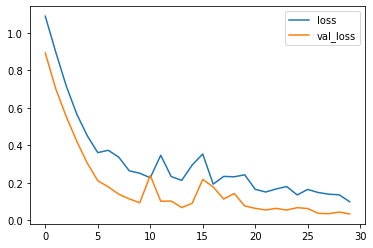

In [13]:
iris_fit_plot[['loss', 'val_loss']].plot.line()

## Second classification dataset with fully connected (Dense) neural network to predict the output based on the input features "wine dataset"

Assigning the `features` and `labels` from the Sickit Learn dataset

In [14]:
wine_features,wine_labels = datasets.load_wine(return_X_y=True)

Splitting the data using `model_selection.train_test_split` from Scikit Learn with test size of '0.1' and using `stratify` to ensure a balanced number of examples for each class label, also setting the `random_state` 


In [15]:
wine_features_train, wine_features_test, wine_labels_train, wine_labels_test = model_selection.train_test_split(wine_features, wine_labels, random_state=42, test_size=0.1,stratify=wine_labels )

One Hot encodeing the `targets/outputs ` to get a better prediction

In [16]:
wine_labels_train = tf.one_hot(wine_labels_train, len(set(wine_labels_train)))
wine_labels_test = tf.one_hot(wine_labels_test, len(set(wine_labels_test)))

Using the shape of the `features ` to determine the number of units for the input layer '13' and the shape of th `labels ` to determine the number of units for the output layer  '3' of the model

In [17]:
wine_features_train.shape, wine_labels_train.shape

((160, 13), TensorShape([160, 3]))

### Building and trainning the model

In [18]:
# to restart tensorflow state
del tf
import tensorflow as tf
tf.random.set_seed(42)

In [20]:
wine_model = tf.keras.Sequential([
                                  tf.keras.layers.Input(shape=[13]),
                                  tf.keras.layers.Dense(256,activation=tf.nn.leaky_relu),
                                  tf.keras.layers.Dense(32,activation=tf.nn.leaky_relu),
                                  tf.keras.layers.Dropout(0.1), # using regularization technique to avoid overfitting
                                  tf.keras.layers.Dense(64,activation=tf.nn.leaky_relu),
                                  tf.keras.layers.Dropout(0.1), 
                                  tf.keras.layers.Dense(128,activation=tf.nn.leaky_relu),
                                  tf.keras.layers.Dense(256,activation=tf.nn.leaky_relu),
                                  tf.keras.layers.Dropout(0.1),
                                  tf.keras.layers.Dense(64,activation=tf.nn.leaky_relu),
                                  tf.keras.layers.Dense(3,activation=tf.nn.softmax)
])

In [21]:
wine_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               3584      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                8224      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 256)              

Using the accuracy metric in the compile function to display 'accuracy' during training



In [22]:
wine_model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.CategoricalCrossentropy(), metrics=['acc'])

In [23]:
wine_fit = wine_model.fit(x= wine_features_train, y= wine_labels_train, validation_data=(wine_features_test, wine_labels_test), epochs=50)

Epoch 1/50
5/5 [==============================] - 1s 67ms/step - loss: 21.2580 - acc: 0.3194 - val_loss: 5.4937 - val_acc: 0.3333
Epoch 2/50
5/5 [==============================] - 0s 15ms/step - loss: 5.8855 - acc: 0.3826 - val_loss: 2.7944 - val_acc: 0.2778
Epoch 3/50
5/5 [==============================] - 0s 13ms/step - loss: 3.5394 - acc: 0.2634 - val_loss: 1.9928 - val_acc: 0.3333
Epoch 4/50
5/5 [==============================] - 0s 16ms/step - loss: 2.0908 - acc: 0.3951 - val_loss: 1.3746 - val_acc: 0.2778
Epoch 5/50
5/5 [==============================] - 0s 13ms/step - loss: 1.8054 - acc: 0.2949 - val_loss: 1.1785 - val_acc: 0.3333
Epoch 6/50
5/5 [==============================] - 0s 13ms/step - loss: 1.3897 - acc: 0.4049 - val_loss: 1.1367 - val_acc: 0.5556
Epoch 7/50
5/5 [==============================] - 0s 15ms/step - loss: 1.4762 - acc: 0.4326 - val_loss: 0.8009 - val_acc: 0.8889
Epoch 8/50
5/5 [==============================] - 0s 15ms/step - loss: 1.0694 - acc: 0.4927 - va

Visualizing the 'loss' and  'val_loss' to display the model preformance during the fitting process

In [24]:
wine_fit_plot = pd.DataFrame(wine_fit.history)

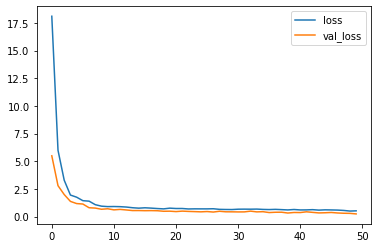

In [25]:
wine_fit_plot[['loss', 'val_loss']].plot.line()